In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000857855"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000857855
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,UNITED COMMUNITY BANKS INC
Ticker,UCBID


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,62.0,1.245500e+01,3.923141e+00,2.960000e+00,1.039750e+01,1.226500e+01,1.533000e+01,1.893000e+01
interest income,62.0,8.878889e+07,2.616773e+07,4.787100e+07,6.562125e+07,8.464400e+07,1.076000e+08,1.444120e+08
net income,62.0,4.738532e+06,5.354639e+07,-2.364150e+08,7.224000e+06,1.476400e+07,1.838725e+07,2.299640e+08
net interest income,62.0,6.456124e+07,1.845065e+07,3.028200e+07,5.572450e+07,5.956900e+07,6.881600e+07,1.156340e+08
provision for loan losses,62.0,1.957742e+07,3.395724e+07,-3.000000e+05,1.800000e+06,3.500000e+06,1.737500e+07,1.900000e+08
total revenue,62.0,6.053844e+07,4.389647e+07,-1.222050e+08,4.516025e+07,6.393150e+07,8.160650e+07,1.358240e+08


# Plots

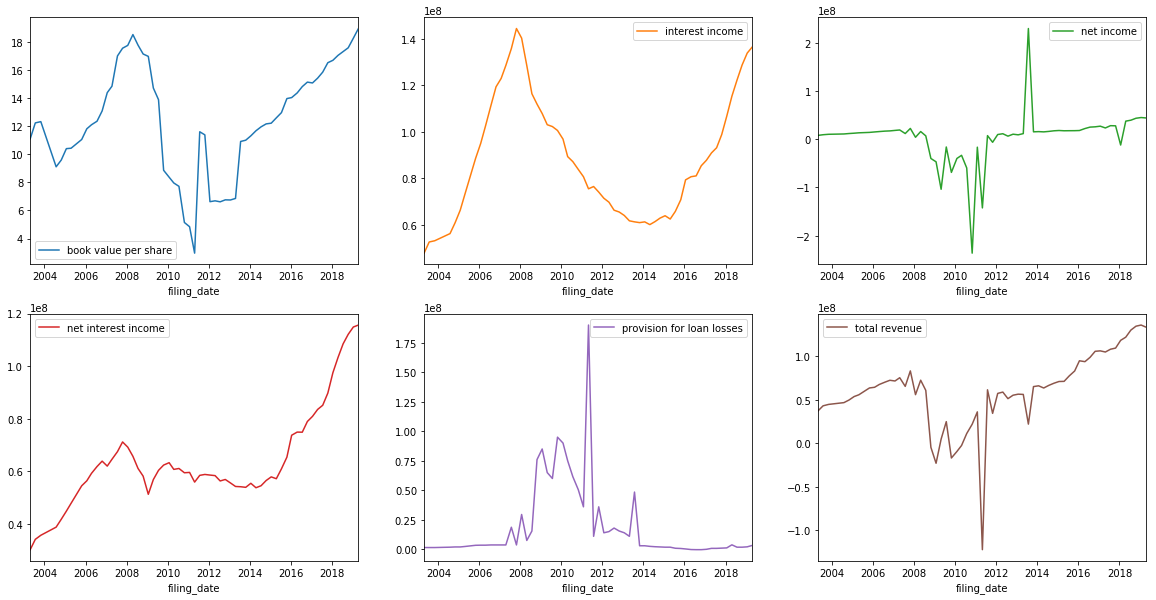

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                              
0000857855 book value per share       2003Q4 to 2004Q1: 2 periods  missing   
           book value per share                            2005Q2  missing   
           interest income            2003Q4 to 2004Q1: 2 periods  missing   
           interest income                                 2005Q2  missing   
           net income                 2003Q4 to 2004Q1: 2 periods  missing   
           net income                                      2005Q2  missing   
           net interest income        2003Q4 to 2004Q1: 2 periods  missing   
           net interest income                             2005Q2  missing   
           provision for loan losses  2003Q4 to 2004Q1: 2 periods  missing   
           provision for loan losses                       2005Q2  missing   
           total revenue              2003Q4 to 2004Q1: 2 periods  missing   
           total revenue                                   2005Q2  missing   

                                             message  
cik        item                                       
0000857855 book value per share       Missing period  
           book value per share       Missing period  
           interest income            Missing period  
           interest income            Missing period  
           net income                 Missing period  
           net income                 Missing period  
           net interest income        Missing period  
           net interest income        Missing period  
           provision for loan losses  Missing period  
           provision for loan losses  Missing period  
           total revenue              Missing period  
           total revenue              Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()